In [72]:
import tensorflow as tf
tf.__version__

'1.13.1'

MNIST database of handwritten digits
Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

Usage:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
Returns:

2 tuples:
x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
y_train, y_test: uint8 array of digit labels (integers in range 0-9) with shape (num_samples,).

In [73]:
# load dataset
mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9

# unpack dataset to training and testing subsets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

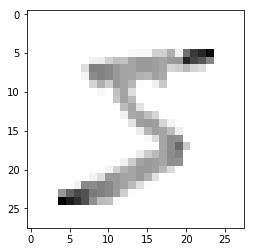

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 7s 155us/sample - loss: 0.2906 - acc: 0.9151 - val_loss: 0.1506 - val_acc: 0.9563
Epoch 2/3
48000/48000 [==============================] - 7s 142us/sample - loss: 0.1178 - acc: 0.9635 - val_loss: 0.1135 - val_acc: 0.9649
Epoch 3/3
48000/48000 [==============================] - 7s 139us/sample - loss: 0.0795 - acc: 0.9754 - val_loss: 0.1068 - val_acc: 0.9678


In [101]:
import matplotlib.pyplot as plt
# look at the first image in training set
# not a colored image so use colormap to put in grayscale
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

# scale/normalize data:
# Normalization is a rescaling of the data from the original 
# range so that all values are within the range of 0 and 1.
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
# parameters in Dense layer
# 128 = number of neurons in the layer
# activation=tf.nn.relu: relu is 
model.add(tf.keras.layers.Dense(128, input_dim=2, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))


# compile model
# adam optimizer is the most common optimizer
# CNN always tries to minimize loss, not maximize accuracy
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


# train model
# epochs = number of iterations
history = model.fit(x_train,y_train,epochs=3,validation_split=0.2)

['acc', 'loss']


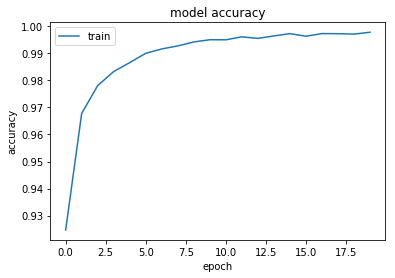

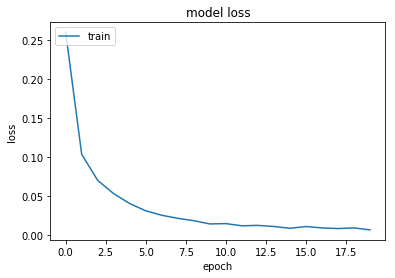

In [83]:
# 97% accuracy after only 3 epochs.
# however, models are always good at fitting -- that is, they're good at memorizing
# and regurgitation, but did it OVERFIT? i.e. is it generalizable? did it find patterns
# in terms of what makes an 8 an 8?

val_loss, val_acc = model.evaluate(x_test, y_test)
print val_loss, val_acc

10000/10000 [==============================] - 1s 76us/sample - loss: 0.1510 - acc: 0.9754
0.1509903650015305 0.9754


In [ ]:
#model.save('epic_num_reader.model')

In [ ]:
#new_model = tf.keras.models.load_model('epic_num_reader.model')

In [ ]:
import numpy as np
x_test = np.array(x_test)
prediction = model.predict([x_test])

In [ ]:
import numpy as np
print np.argmax(prediction[0])

In [ ]:
plt.imshow(x_test[0], cmap = plt.cm.binary)
plt.show()

In [ ]:
print np.argmax(prediction[1])
plt.imshow(x_test[1], cmap = plt.cm.binary)
plt.show()

In [ ]:
print np.argmax(prediction[8])
plt.imshow(x_test[8], cmap = plt.cm.binary)
plt.show()

In [ ]:
print np.argmax(prediction[19])
plt.imshow(x_test[19], cmap = plt.cm.binary)
plt.show()

['acc', 'loss', 'val_acc', 'val_loss']


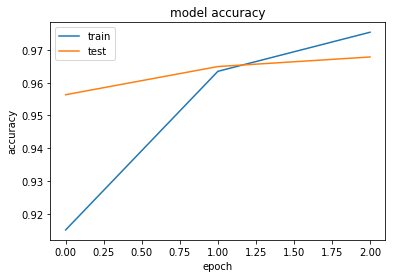

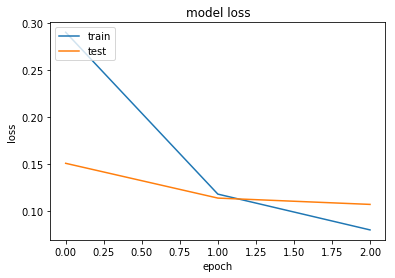

In [102]:
# test for overfitting 
# https://towardsdatascience.com/deep-learning-overfitting-846bf5b35e24
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'],label='train')
plt.plot(history.history['val_acc'],label='train')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='train')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()